Use python to create a 2D CNN classifier model that can identify different images in CIFAR-10 dataset. This dataset
consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and
10000 test images. More details about this dataset can be found in: https://www.cs.toronto.edu/~kriz/cifar.html

1) Import all the necessary libraries, read the dataset from Keras libraries using cifar10.load_data(). Normalize all the train
and test images by dividing with 255.0. Employ one hot encoding for class labels in the train and test data. [15% marks].

2) Build a 2D CNN classifier model using Sequential API having the following parameters: [25% marks].

• Three Conv2D layers
• Layer 1 has 32 neurons, input_shape= (32,32, 3)
• Layer 2 has 64 neurons
• Layer 3 has 128 neurons
• All Conv2D layers must use relu activation
• Use a kernel_size= (3,3) in all the Conv2D layers
• Three MaxPooling2D layers (pool_size=(2,2)), alternating with Conv2D layers
• Flatten layer is followed by a fully connected (Dense) layer with 128 neurons and relu activation
• This is followed by a Dropout with a value 0.4.
• The last Dense layer is the output layer which uses softmax activation

3) Compile the model using categorical crossentropy loss and optimizer to be used is RMSprop. The learning rate value
must be 0.0001 and metric used is accuracy. [20% marks].

4) Train the model with batch_size=128, epochs=100. Display the curves of loss and accuracy during training. Check if the
model is overfitting or underfitting and comment on that. Then save the model (in .h5 format) using model.save. [20%
marks].

5) Evaluate the model on test data using several evaluation metrics such as accuracy, precision, and recall. Make a
comparison of AUC values for each class depicted through a ROC graph. [20% marks].


#Question 1

In [ ]:
import tensorflow as tf
import keras
from tensorflow import keras
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns
%matplotlib inline


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
cfar10_labels=["airplane",
               "automobile",
               "bird",
               "cat",
               "deer",
               "dog",
               "frog",
               "horse",
               "ship",
               "truck"]

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
y_tr_org = np.copy(y_train)
y_tst_org = np.copy(y_test)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 10)
50000 train set
10000 test set


#Question 2

In [ ]:
model = keras.models.Sequential() #sequential API

model.add(keras.layers.Conv2D(filters=32, kernel_size= (3,3), padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

#Question 3

In [ ]:
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#Question 4

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("CFAR10.h5", save_best_only=True)

history= model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/100
391/391 [==============================] - 8s 17ms/step - loss: 2.0160 - accuracy: 0.2679 - val_loss: 1.7721 - val_accuracy: 0.3788
Epoch 2/100
391/391 [==============================] - 6s 16ms/step - loss: 1.7529 - accuracy: 0.3700 - val_loss: 1.6086 - val_accuracy: 0.4388
Epoch 3/100
391/391 [==============================] - 6s 16ms/step - loss: 1.6386 - accuracy: 0.4098 - val_loss: 1.5424 - val_accuracy: 0.4585
Epoch 4/100
391/391 [==============================] - 6s 16ms/step - loss: 1.5636 - accuracy: 0.4360 - val_loss: 1.4616 - val_accuracy: 0.4773
Epoch 5/100
391/391 [==============================] - 6s 16ms/step - loss: 1.4999 - accuracy: 0.4588 - val_loss: 1.4002 - val_accuracy: 0.5029
Epoch 6/100
391/391 [==============================] - 6s 16ms/step - loss: 1.4511 - accuracy: 0.4771 - val_loss: 1.3733 - val_accuracy: 0.5109
Epoch 7/100
391/391 [==============================] - 6s 16ms/step - loss: 1.4062 - accuracy: 0.4965 - val_loss: 1.3247 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

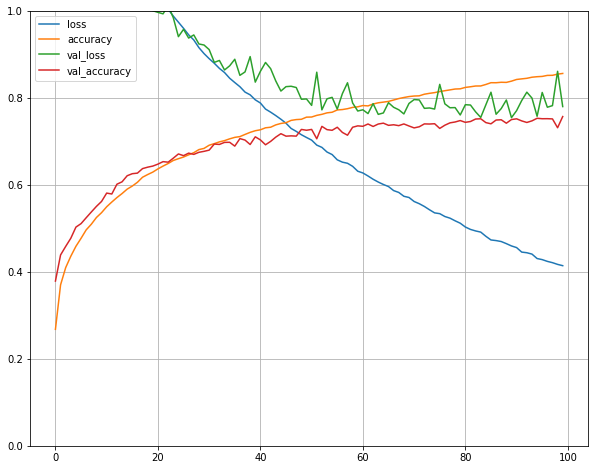

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.save("CFAR10.h5")
model.save_weights("CFAR10.ckpt")

The model is overfitted because the accuracy in the test set begins to decrease from the epoch 28 approx., while in the training set it continous to increase. In the end, the valid accuracy is less than the training accuracy. In addition, the valid loss is much higher than the training loss, which decreases showing that it models the training data too well and therefore I can conclude there is overfitting.  

#Question 5

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.780042290687561
Test accuracy: 0.757099986076355


In [ ]:
pred_all = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_tst_org, pred_all)

Text(0.5, 257.44, 'Predicted label')

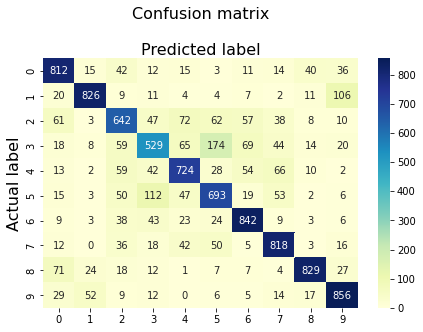

In [ ]:
cls_names=[0,1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_tst_org, pred_all, target_names=['0', '1', '2','3','4','5','6','7','8','9']))


Classification Report

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.88      0.83      0.85      1000
           2       0.67      0.64      0.65      1000
           3       0.63      0.53      0.58      1000
           4       0.73      0.72      0.73      1000
           5       0.66      0.69      0.68      1000
           6       0.78      0.84      0.81      1000
           7       0.77      0.82      0.79      1000
           8       0.88      0.83      0.86      1000
           9       0.79      0.86      0.82      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



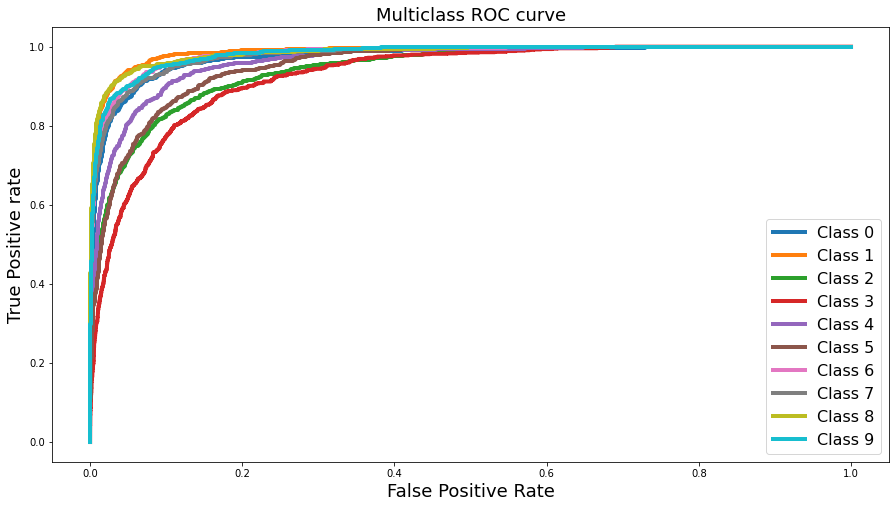

In [ ]:
fpr = {}
tpr = {}
thres ={}
n_class = 10

pred_prob = model.predict(x_test)

for i in range(n_class): 
    fpr[i], tpr[i], thres[i] = roc_curve(y_tst_org, pred_prob[:,i], pos_label=i)

figure = plt.figure(figsize=(15, 8))
 
plt.plot(fpr[0], tpr[0],linewidth = 4, label='Class 0')
plt.plot(fpr[1], tpr[1],linewidth = 4,label='Class 1')
plt.plot(fpr[2], tpr[2],linewidth = 4,label='Class 2')
plt.plot(fpr[3], tpr[3],linewidth = 4,label='Class 3')
plt.plot(fpr[4], tpr[4],linewidth = 4, label='Class 4')
plt.plot(fpr[5], tpr[5],linewidth = 4, label='Class 5')
plt.plot(fpr[6], tpr[6],linewidth = 4,label='Class 6')
plt.plot(fpr[7], tpr[7],linewidth = 4,label='Class 7')
plt.plot(fpr[8], tpr[8],linewidth = 4,label='Class 8')
plt.plot(fpr[9], tpr[9],linewidth = 4, label='Class 9')

plt.title('Multiclass ROC curve',fontsize = 18)
plt.xlabel('False Positive Rate',fontsize = 18)
plt.ylabel('True Positive rate',fontsize = 18)
plt.legend(loc='best',fontsize = 16)

plt.show()